# Evaluation of sequential experiments

The purpose of this notebook is to create plots for the sequential experiments were we analyze the optimal treatments for various values of lambda.

In [1]:
# Adapt path to allow imports from project
import os
os.chdir("..")

In [2]:
import time
import pandas as pd
from src.baseline.evaluate import build_combined_single_frame, build_combined_dual_frame, best_sequential_single_treatment, best_sequential_dual_treatment
from src.search.evaluate_search import best_interpolated_multi_search_result, best_sequential_search_result
from src.env.cell_lines import retrieve_lines

In [3]:
%pylab inline
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['ptm', 'Helvetica', 'Times New Roman']

Populating the interactive namespace from numpy and matplotlib


#### Configuration

In [4]:
# param for retrieval
LAMBDAS = np.arange(-7.0, -1.0 + 0.01, 0.25)
OBJ = "worst"
DOMAIN = "simplex"
N_STEPS = 2

In [5]:
# meta
PATH_EVAL = "./artifacts/evaluation/sequential/"
PATH_SQUENTIAL_DATA = "./artifacts/sequential/"
PATH_SQUENTIAL_BASELINE_DATA = "./artifacts/sequential_baseline/"
PATH_MULTI_DATA = "./artifacts/multi/"
# TISSUE = "skin"
TISSUE = "intestine"
THRESHOLD = 8000
VERIFICATION = False

#### Prepare Data

In [6]:
# functions for data retrieval

def get_data_search():
    """This functions uses data from the sequential search procedure."""
    lambdas, proliferations, objectives, concentrations, treatments = [], [], [], [], []
    for la in LAMBDAS:
        # prepare prefix
        if la == 12345:
            lambd = 0
            prefix = str(N_STEPS) + "step_" + OBJ + "_" + DOMAIN + "_" + "prolif" + "_cma_es" 
        else: 
            prefix = str(N_STEPS) + "step_" + OBJ + "_" + DOMAIN + "_" + str(la).replace(".", "_") + "_cma_es"
            lambd = 10 ** la
        treat, o_dos, o_pro, o_obj = best_sequential_search_result(TISSUE, PATH_SQUENTIAL_DATA, prefix, N_STEPS, lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION)
        lambdas.append(lambd)
        proliferations.append(o_pro)
        objectives.append(o_obj)
        concentrations.append(o_dos)
        treatments.append(treat)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d lambdas loaded..." % len(lambdas))
    return lambdas, proliferations, objectives, concentrations, treatments

def get_data_search_baseline():
    """This is the data were one searches for a treatment that is applied multiple times."""
    lambdas, proliferations, objectives, concentrations, treatments = [], [], [], [], []
    for la in LAMBDAS:
        # prepare prefix
        if la == 12345:
            lambd = 0
            prefix = str(N_STEPS) + "step_" + OBJ + "_" + DOMAIN + "_" + "prolif" + "_cma_es" 
        else: 
            prefix = str(N_STEPS) + "step_" + OBJ + "_" + DOMAIN + "_" + str(la).replace(".", "_") + "_cma_es"
            lambd = 10 ** la
        treat, o_dos, o_pro, o_obj = best_sequential_search_result(TISSUE, PATH_SQUENTIAL_BASELINE_DATA, prefix, N_STEPS, lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION)
        lambdas.append(lambd)
        proliferations.append(o_pro)
        objectives.append(o_obj)
        concentrations.append(o_dos)
        treatments.append(treat)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d lambdas loaded..." % len(lambdas))
    return proliferations, objectives, concentrations, treatments

def get_data_interpolated_search():
    """This functions interpolates the results from the single step search."""
    proliferations, objectives, concentrations, treatments = [], [], [], []
    for la in LAMBDAS:
        # prepare prefix
        if la == 12345:
            lambd = 0
            prefix = OBJ + "_" + DOMAIN + "_" + "prolif" + "_cma_es"
        else: 
            prefix = OBJ + "_" + DOMAIN + "_" + str(la).replace(".", "_") + "_cma_es"
            lambd = 10 ** la
        treat, o_dos, o_pro, o_obj = best_interpolated_multi_search_result(TISSUE, PATH_MULTI_DATA, prefix, N_STEPS, lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION)
        proliferations.append(o_pro)
        objectives.append(o_obj)
        concentrations.append(o_dos)
        treatments.append(treat)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d lambdas loaded..." % len(lambdas))
    return proliferations, objectives, concentrations, treatments

        
def get_data_single(lambdas):
    comb_data = build_combined_single_frame(retrieve_lines(TISSUE))
    proliferations, objectives, concentrations = [], [], []
    for lambd in lambdas:
        treat, s_dos, s_pro, s_obj = best_sequential_single_treatment(retrieve_lines(TISSUE), N_STEPS, lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION, comb_data=comb_data)
        proliferations.append(s_pro)
        objectives.append(s_obj)
        concentrations.append(s_dos)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d out of %d lambdas loaded..." % (len(proliferations), len(lambdas)))
    return proliferations, objectives, concentrations
    
def get_data_dual(lambdas):
    comb_data = build_combined_dual_frame(retrieve_lines(TISSUE))
    proliferations, objectives, concentrations = [], [], []
    for lambd in lambdas:
        treat, d_dos, d_pro, d_obj = best_sequential_dual_treatment(retrieve_lines(TISSUE), N_STEPS, lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION, comb_data=comb_data)
        proliferations.append(d_pro)
        objectives.append(d_obj)
        concentrations.append(d_dos)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d out of %d lambdas loaded..." % (len(proliferations), len(lambdas)))
    return proliferations, objectives, concentrations


In [7]:
t0 = time.time()
print("Retrieving: Search results")
lambdas, search_prolifs, search_objectives, search_concentration, search_treatments = get_data_search()
print("Total time: ", round(time.time() - t0, 2), " seconds")
t0 = time.time()

#print("Retrieving: Interpolated search results")
#interpolated_prolifs, interpolated_objectives, interpolated_concentration, interpolated_treatments = get_data_interpolated_search()
#print("Total time: ", round(time.time() - t0, 2), " seconds")
#t0 = time.time()

print("Retrieving: Sequential search baseline results")
seq_baseline_prolifs, seq_baseline_objectives, seq_baseline_concentration, seq_baseline_treatments = get_data_search_baseline()
print("Total time: ", round(time.time() - t0, 2), " seconds")
t0 = time.time()

print("Retrieving: Single drug results")
single_prolifs, single_objectives, single_concentration = get_data_single(lambdas)
print("Total time: ", round(time.time() - t0, 2), " seconds")
t0 = time.time()

print("Retrieving: Dual drug results")
dual_prolifs, dual_objectives, dual_concentration = get_data_dual(lambdas)
print("Total time: ", round(time.time() - t0, 2), " seconds")

Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.6  seconds
Retrieving: Sequential search baseline results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.43  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.31  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  16.94  seconds


In [8]:
# analyze number of used drugs
thres_abs = 10
thres_percent = 5
n_drugs = []

# determine number following criteria
# TODO: Count dosage percent per treatment step instead of combined sum
for i, treats in enumerate(search_treatments): # iterates through all lambdas
    n_drugs.append(0)
    for k in treats[0]:
        for treat in treats:
            if treat[k] >= thres_abs and (treat[k] / search_concentration[i]) * 100 >= thres_percent:
                n_drugs[-1] += 1
                break
                

#### Create Plot

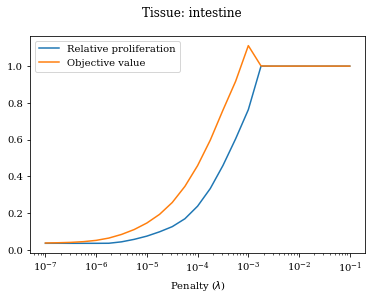

In [9]:
# visualize dependence of objective and achieved proliferation for search results 

fig, ax = plt.subplots()
fig.suptitle('Tissue: ' + TISSUE)

l1, = ax.plot(lambdas, search_prolifs)
l1.set_label("Relative proliferation")

l2, = ax.plot(lambdas, search_objectives)
l2.set_label("Objective value")

ax.set_xscale('log')
ax.set_xlabel("Penalty ($\\lambda$)")
#ax.set_ylabel("Relative proliferation and Objective value")
ax.legend()

plt.show()

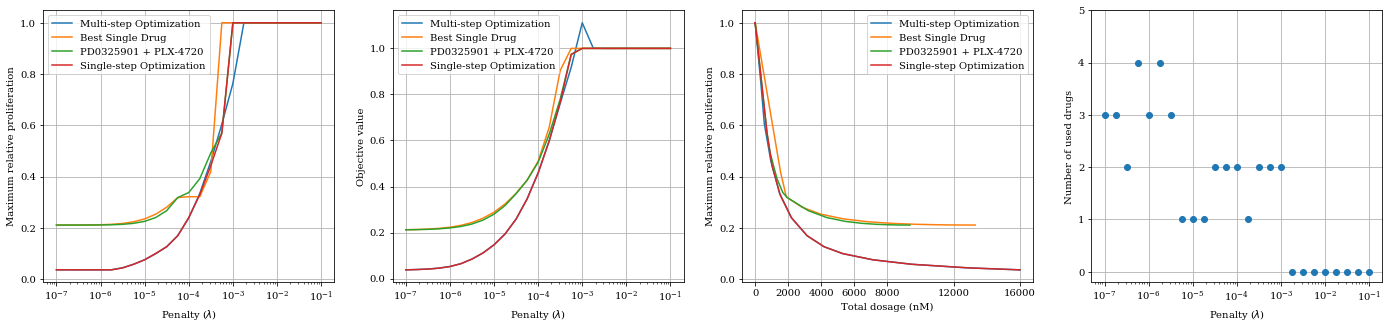

In [10]:
# compare search with baselines with proliferation and objective value

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,5)) # 4x1 format
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13,8)) # 2x2 format
# fig.suptitle('Results sequential-cell experiment: ' + TISSUE)
# fig.suptitle('Tissue: ' + TISSUE)

l1, = ax1.plot(lambdas, search_prolifs)
l1.set_label("Multi-step Optimization")
l2, = ax1.plot(lambdas, single_prolifs)
l2.set_label("Best Single Drug")
l3, = ax1.plot(lambdas, dual_prolifs)
l3.set_label("PD0325901 + PLX-4720")
#l31, = ax1.plot(lambdas, interpolated_prolifs)
l31, = ax1.plot(lambdas, seq_baseline_prolifs)
l31.set_label("Single-step Optimization")

l4, = ax2.plot(lambdas, search_objectives)
l4.set_label("Multi-step Optimization")
l5, = ax2.plot(lambdas, single_objectives)
l5.set_label("Best Single Drug")
l6, = ax2.plot(lambdas, dual_objectives)
l6.set_label("PD0325901 + PLX-4720")
#l61, = ax2.plot(lambdas, interpolated_objectives)
l61, = ax2.plot(lambdas, seq_baseline_objectives)
l61.set_label("Single-step Optimization")

l7, = ax3.plot(search_concentration, search_prolifs)
l7.set_label("Multi-step Optimization")
l8, = ax3.plot(single_concentration, single_prolifs) # TODO: change this plot as in the other experiments
l8.set_label("Best Single Drug")
l9, = ax3.plot(dual_concentration, dual_prolifs)
l9.set_label("PD0325901 + PLX-4720")
#l91, = ax3.plot(lambdas, interpolated_concentration)
l91, = ax3.plot(seq_baseline_concentration, seq_baseline_prolifs)
l91.set_label("Single-step Optimization")

l10, = ax4.plot(lambdas, n_drugs, "o")
l10.set_label("Multi-step Optimization")

ax1.set_xscale('log')
ax1.set_xlabel("Penalty ($\\lambda$)")
ax1.set_ylabel("Maximum relative proliferation")
ax1.legend()
ax1.grid(True)

ax2.set_xscale('log')
ax2.set_xlabel("Penalty ($\\lambda$)")
ax2.set_ylabel("Objective value")
ax2.legend()
ax2.grid(True)

ax3.set_xlabel("Total dosage (nM)")
ax3.set_ylabel("Maximum relative proliferation")
ax3.set_xticks([0,  2000,  4000,  6000,  8000,  12000,  16000])
ax3.legend()
ax3.grid(True)

ax4.set_xscale('log')
ax4.set_xlabel("Penalty ($\\lambda$)")
ax4.set_ylabel("Number of used drugs")
ax4.set_yticks([0, 1, 2, 3, 4, 5])
# ax4.legend()
ax4.grid(True)

plt.savefig("./notebooks/plots/" + str(N_STEPS) + "step_" + TISSUE +  ".pdf", bbox_inches = 'tight')
plt.savefig("./notebooks/plots/" + str(N_STEPS) + "step_"  + TISSUE +  ".png")
plt.show()

In [11]:
search_concentration

[15999.631028698648,
 15999.658650325486,
 15996.953173123422,
 15999.765012798782,
 15999.996504328295,
 15845.530156436424,
 12717.212508781078,
 9494.770788226222,
 7130.203569784896,
 5338.160582309964,
 4152.309907884833,
 3130.3228524761794,
 2204.939269347372,
 1480.7222573785943,
 951.9159577604078,
 556.5001305259249,
 348.1163731071069,
 0.5570148900210758,
 0.00023061383924478243,
 0.00031858410296243454,
 0.025294811493631646,
 0.0008478256523464608,
 0.003613474931647754,
 0.0036856785222349696,
 0.0009827893556245775]

### Investigate the drugs used for the treatment

In [12]:
# create new dataframe from combined dictionary

c1 = {}
c2 = {}
for k in search_treatments[0][0]:
    c1[k] = []
    c2[k] = []
    
for i, la in enumerate(LAMBDAS):
    for k in search_treatments[i][0]:
        c1[k].append(int(search_treatments[i][0][k]))
        c2[k].append(int(search_treatments[i][1][k]))

df1 = pd.DataFrame.from_dict(c1)
df2 = pd.DataFrame.from_dict(c2)

In [13]:
df1

,PD0325901,PLX-4720,Selumetinib,Lapatinib,Erlotinib,CHIR-265,Vandetanib
0,4603,2233,0,974,185,0,0
1,4633,2309,0,770,285,0,0
2,5015,6,2,580,221,2166,4
3,4522,2433,0,867,175,0,0
4,4884,0,0,679,199,2236,0
5,4379,2496,0,886,114,5,0
6,4411,1096,0,524,255,0,2
7,4049,1,0,280,275,4,1
8,3048,1,0,103,256,1,0
9,2336,0,0,197,64,0,0


In [14]:
df2

,PD0325901,PLX-4720,Selumetinib,Lapatinib,Erlotinib,CHIR-265,Vandetanib
0,4706,2127,0,1104,58,0,0
1,5386,532,0,587,319,1173,0
2,5206,2,2,596,187,1996,5
3,5418,0,0,533,351,1695,0
4,4913,2105,0,706,274,0,0
5,5207,2,0,644,283,1821,1
6,4504,0,0,507,244,1170,0
7,3974,3,1,364,216,319,1
8,3291,0,1,242,178,2,1
9,2489,0,0,157,89,0,0


NameError: name 'plot_bar_chart' is not defined

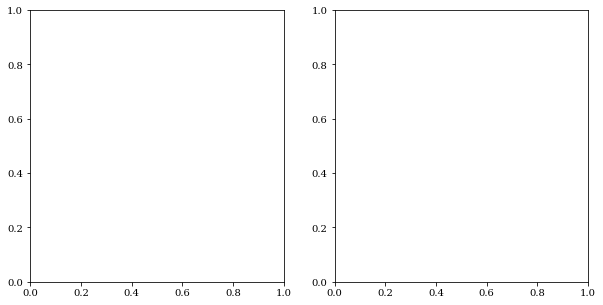

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
plot_bar_chart(ax1, df1, 1)
plot_bar_chart(ax2, df2, 2)
plt.show()